### Part 2

Data Source:
https://data.medicare.gov/Hospital-Compare/Hospital-Readmissions-Reduction-Program/9n3s-kdb3

Data Description:
n October 2012, CMS began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, calculated by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack (AMI), heart failure (HF), pneumonia, chronic obstructive pulmonary disease (COPD), hip/knee replacement (THA/TKA), and coronary artery bypass graft surgery (CABG) by the number that would be “expected,” based on an average hospital with similar patients.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\katec\Thinkful\data_collections\Hospital_Readmissions_Reduction_Program.csv')

In [ ]:
df['Measure Name'].unique()

In [3]:
def measure_id (row):
   if row['Measure Name'] == 'READM_30_COPD_HRRP' :
      return 'COPD'
   if row['Measure Name'] == 'READM_30_HF_HRRP' :
      return 'HF'
   if row['Measure Name'] == 'READM_30_PN_HRRP' :
      return 'PN'
   if row['Measure Name'] == 'READM_30_AMI_HRRP' :
      return 'AMI'
   if row['Measure Name'] == 'READM_30_HIP_KNEE_HRRP' :
      return 'HIP_KNEE'
   if row['Measure Name'] == 'READM_30_CABG_HRRP' :
      return 'CABG'

In [4]:
df.apply (lambda row: measure_id(row), axis=1)

0             AMI
1            CABG
2            COPD
3              HF
4        HIP_KNEE
5              PN
6             AMI
7            CABG
8            COPD
9              HF
10       HIP_KNEE
11             PN
12            AMI
13           CABG
14           COPD
15             HF
16       HIP_KNEE
17             PN
18            AMI
19           CABG
20           COPD
21             HF
22       HIP_KNEE
23             PN
24            AMI
25           CABG
26           COPD
27             HF
28       HIP_KNEE
29             PN
           ...   
19644         AMI
19645        CABG
19646        COPD
19647          HF
19648    HIP_KNEE
19649          PN
19650         AMI
19651        CABG
19652        COPD
19653          HF
19654    HIP_KNEE
19655          PN
19656         AMI
19657        CABG
19658        COPD
19659          HF
19660    HIP_KNEE
19661          PN
19662         AMI
19663        CABG
19664        COPD
19665          HF
19666    HIP_KNEE
19667          PN
19668     

In [5]:
df['measure'] = df.apply (lambda row: measure_id(row), axis=1)

###### Remove missing values by converting 'Not Available' values to NaN, then dropping NaN values.

In [6]:
df_with_nans = df.applymap(lambda elem: float('NaN') if elem == "Not Available" else elem)

###### Make a copy of df ( rather than a slice) to avoid errors and warnings

In [7]:
df_readmin = df_with_nans.dropna(subset=df_with_nans.columns.drop('Footnote')).copy() 

###### Convert selected columns to numeric

In [8]:
for column in ['Number of Discharges', 'Excess Readmission Ratio', 'Predicted Readmission Rate', 'Expected Readmission Rate', 'Number of Readmissions']:
    df_readmin[column] = pd.to_numeric(df_readmin[column], errors = 'coerce', downcast = 'float')

In [ ]:
df_readmin.info()

In [9]:
df_readmin.groupby('Measure Name')['Excess Readmission Ratio'].describe()

,count,mean,std,min,25%,50%,75%,max
Measure Name,,,,,,,,
READM_30_AMI_HRRP,1666.0,1.005694,0.068506,0.7479,0.962050,1.00620,1.049875,1.2927
READM_30_CABG_HRRP,596.0,1.022244,0.118904,0.7428,0.940425,1.02185,1.100550,1.7072
READM_30_COPD_HRRP,2551.0,1.004937,0.062906,0.8126,0.964350,1.00220,1.041750,1.3222
READM_30_HF_HRRP,2670.0,1.003497,0.076744,0.7467,0.953625,1.00095,1.052000,1.3394
READM_30_HIP_KNEE_HRRP,1301.0,1.022134,0.153250,0.5982,0.911500,1.01080,1.116900,1.8256
READM_30_PN_HRRP,2748.0,1.004802,0.081388,0.7610,0.948400,0.99880,1.055625,1.3801


Find a dataset with at least four continuous variables and one categorical variable. Create one master plot that gives insight into the variables and their interrelationships, including:
    + Probability distributions
    + Bivariate relationships
    + Whether the distributions or the relationships vary across groups
    + Accompany your plot with a written description of what you see.

In [ ]:
df_readmin.head()

Continue use of Part 1 data: df_readmin
Variables used for plotting: 

**continuous:** Excess Readmission Ratio, actual_rratio, Expected Readmission Rate, actual_rrate

**categorical:** measure


Excess Readmission Ratio: represents Hospital's "predicted" number of readmissions compared to CMS "expected" number of readmissions. 

Calculate the **Actual Readmission Rate** = 'actual_rrate' (number of readmissions/discharges)

Calculate the **Actual Readmission Ratio** = 'actual_rratio' ('actual_rrate'/'Expected Readmission Rate') in order to compare the Excess Readmission Ratio

In [10]:
df_readmin['actual_rrate'] = df_readmin['Number of Readmissions']/df_readmin['Number of Discharges'] * 100

In [11]:
df_readmin['actual_rratio'] = df_readmin['actual_rrate']/df_readmin['Expected Readmission Rate']

In [ ]:
df_readmin.head()

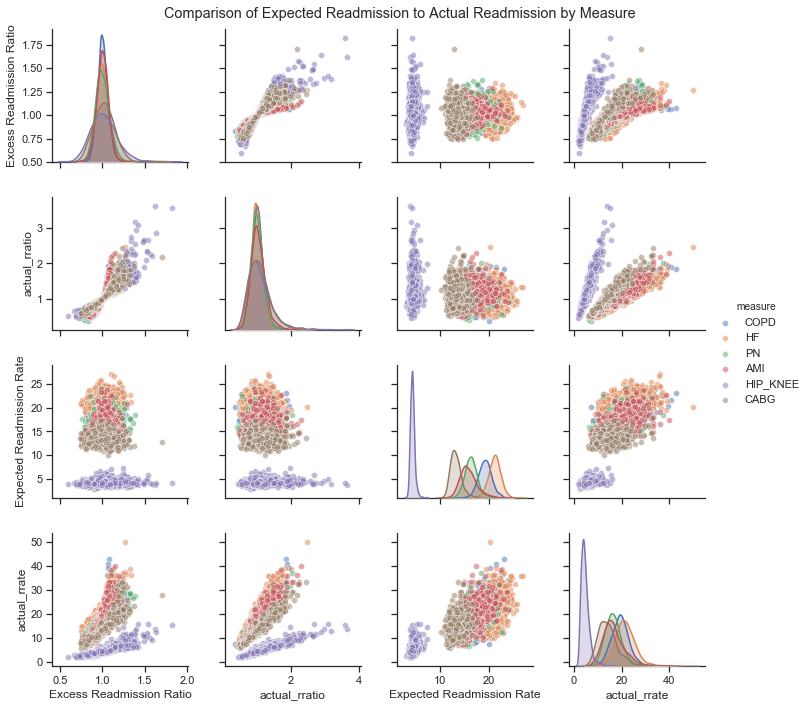

In [21]:
sns.set(style="ticks")

sns.pairplot(df_readmin[['Excess Readmission Ratio', 'actual_rratio', 'Expected Readmission Rate', 'actual_rrate', 'measure']], 
            hue= 'measure',
            plot_kws = {'alpha': 0.5})
plt.subplots_adjust(top=0.95)
plt.suptitle('Comparison of Expected Readmission to Actual Readmission by Measure')
plt.show()

Create one master plot that gives insight into the variables and their interrelationships, including:

+ Probability distributions
+ Bivariate relationships
+ Whether the distributions or the relationships vary across groups
+ Accompany your plot with a written description of what you see.

###### Insights
The Excess (Expected)Readmission Ratio (ERR) ranges between 0.5 - 2.0. The hightest ERR for COPD is close to 2.0, the ERR for AMI, HF, PN, and CABG ranging between <1.75 and >1.0 respectively, and the lowest ERR at approximately 1.0 for HIP_KNEE replacement. When compared to the actual_r(eadmission)ratio (ARR) however, it appears that the ARR far exceeds the ERR by almost double, ranging in descending order from the highest ARR at close to 4.0 for HF, COPD, and PN, to 3.0 for AMI, and finally 2.0 for CABG and HIP_KNEE. **The ARR far exceeds the ERR, by almost double.**

A comparison of the Expected Readmission Rate (ERate) and the actual_r(admission)rate (ARate) provide similar results. The ARate for every measure appears to be approximately double that of ERate. In contrast to the ERR vs ARR, however, the ERate vs ARate appear to follow the same 'order' of excpected admissions by measure category. This difference in the ERR vs ARR reflects a larger margin of error in the calculation of the ERate for some measures over other measures. This may reflect a poor understanding on the part of CMS for the more complex care required for chronic illnesses such as HF and COPD, (and PN related to these conditions)as opposed to more acute conditions related to surgical conditions such as CABG and HIP_KNEE replacement. 

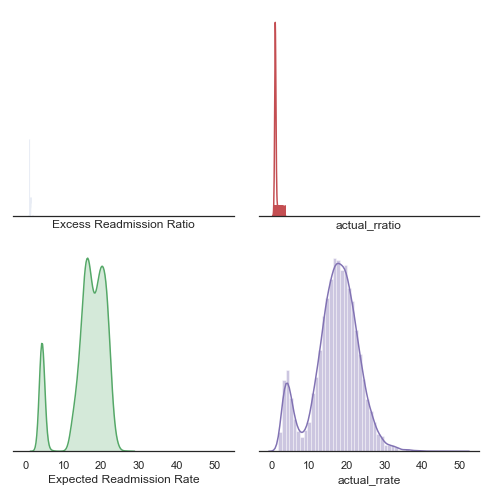

In [13]:
#Example of univariate plot code
sns.set(style="white",  color_codes=True)


# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.despine(left=True)


# Plot a simple histogram with binsize determined automatically
sns.distplot(df_readmin['Excess Readmission Ratio'], kde=False, color = 'b', ax=axes[0, 0])

# Plot a kernel density estimate and rug plot
sns.distplot(df_readmin['actual_rratio'], hist=False, rug=True, color="r", ax=axes[0, 1])

# Plot a filled kernel density estimate
sns.distplot(df_readmin['Expected Readmission Rate'], hist=False, color="g", kde_kws={"shade": True}, ax=axes[1, 0])

# Plot a historgram and kernel density estimate
sns.distplot(df_readmin['actual_rrate'], color="m", ax=axes[1, 1])

plt.setp(axes, yticks=[])
plt.tight_layout()